In [13]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import datetime as DT
#PCA y Silhouette
from sklearn.decomposition import PCA
from  sklearn.metrics import silhouette_score
#Librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.cm as cm
from sklearn import decomposition

In [14]:
#IMPORTAMOS EL DATASET
tp_h = pd.read_csv(r'tp_grupo13_limpio.csv', delimiter=',', low_memory= 'false')
tp_h = tp_h.drop(['Unnamed: 0'], axis= 1)

In [15]:
#Verificamos que se importó bien
tp_h.shape

(56731, 19)

In [16]:
tp_h.head(5)

,country,id,unit_discount_usd,unit_gross_revenue_local,order_date,order_status,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,order_time,brand,name,category,subcategory,year,month,day
0,Argentina,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",0.0000,1030.0000,2017-09-20 00:00:00,paid,ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38b4...,890.0,140.0000,1,788.0530,1900-01-01 18:19:39,Corona,Pack Corona Experience,Beer,Others,2017,9,20
1,Argentina,"[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...",0.0000,631.0000,2017-06-13 00:00:00,paid,ar_bevybar;41434b744330c691cf83b70da3fa080c85a...,432.0,199.0000,1,493.6944,1900-01-01 12:56:23,Patagonia Brewing Co.,Pack de Cervezas y Vasos Patagonia,Mixed Pack,unknown,2017,6,13
2,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",2.7181,234.6542,2017-02-28 00:00:00,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,265.0,14.7222,1,176.2018,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
3,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",1.8052,155.8458,2017-02-28 00:00:00,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,44.0,9.7778,4,117.0246,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
4,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",9.0465,910.0000,2017-07-30 00:00:00,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,1011.0,49.0000,1,698.5160,1900-01-01 17:15:42,BevyBar,Pack Degustación del Mes de Julio XL,Mixed Pack,unknown,2017,7,30


In [17]:
#Limpio las variables que no sirven para clusterizar
tp_cluster = tp_h.drop(['order_time','name','id','customer_spk','country','order_date','order_status','subcategory'], axis=1)

# Vamos entonces a buscar clusterizar:
##    1 - Todo el dataset
##    2 - Solo las marcas importadas
##    3 - Solo las marcas core de negocio 

In [18]:
# 1 - Clustering general
tp_cluster1= tp_cluster.loc[tp_h['brand'].isin(['Corona', 'Patagonia Brewing Co.', 'Peñón del Águila',
       'Bass Brewery', 'Leffe', "Fuller's",
       'Spaten-Franziskaner-Bräu', 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Barba Roja', 'Coopers Brewery',
       'Brouwerij Van Steenberge', 'Hoegaarden', 'Backus y Johnston',
       'Löwenbräu', 'Brauerei Beck & Co',
       'Fabricas Nacionales De Cerveza',
       'De La Vaca Tranquila Cervezas Artesanales',
       'Paulaner Brauerei München', 'Duvel Moortgat', 'Zillertal',
       'Baltika Breweries', 'Hofbräu München', 'Chimay',
       'Kronenbourg 1664', 'Czechvar', 'Kulmbacher Brauerei AG',
       'Grimbergen', 'Maredsous', 'Tsingtao',
       'Fábricas Nacionales De Cerveza',
       'Anchor Brewing Company', 'Cervecería Antares',
       'Brasserie de Silly', 'SAB Miller', 'Shock Top', 'Belsh',
       'OETTINGER Brauerei GmbH', 'Erdinger Weissbräu', 'Oranjeboom',
       'BevyBar','Stella Artois', 'Cervecería y Maltería Quilmes'])]
tp_cluster1.head(5)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,brand,category,year,month,day
0,0.0000,1030.0000,890.0,140.0000,1,788.0530,Corona,Beer,2017,9,20
1,0.0000,631.0000,432.0,199.0000,1,493.6944,Patagonia Brewing Co.,Mixed Pack,2017,6,13
2,2.7181,234.6542,265.0,14.7222,1,176.2018,Peñón del Águila,Beer,2017,2,28
3,1.8052,155.8458,44.0,9.7778,4,117.0246,Peñón del Águila,Beer,2017,2,28
4,9.0465,910.0000,1011.0,49.0000,1,698.5160,BevyBar,Mixed Pack,2017,7,30


In [19]:
#Genero dummies de brand y category
brands = pd.get_dummies(tp_cluster1.brand)
category = pd.get_dummies(tp_cluster1.category)
#concateno las tablas
tp_cluster1 = pd.concat([tp_cluster1,brands,category],axis=1)
tp_cluster1 = tp_cluster1.drop(['brand','category'], axis=1)
tp_cluster1.head(3)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day,Anchor Brewing Company,...,Peñón del Águila,SAB Miller,Shock Top,Spaten-Franziskaner-Bräu,Stella Artois,Tsingtao,Zillertal,Beer,Merchandise,Mixed Pack
0,0.0000,1030.0000,890.0,140.0000,1,788.0530,2017,9,20,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0000,631.0000,432.0,199.0000,1,493.6944,2017,6,13,0,...,0,0,0,0,0,0,0,0,0,1
2,2.7181,234.6542,265.0,14.7222,1,176.2018,2017,2,28,0,...,1,0,0,0,0,0,0,1,0,0


In [20]:
#AutoScaling
scaler = preprocessing.StandardScaler().fit(tp_cluster1)
xscal = scaler.transform(tp_cluster1)

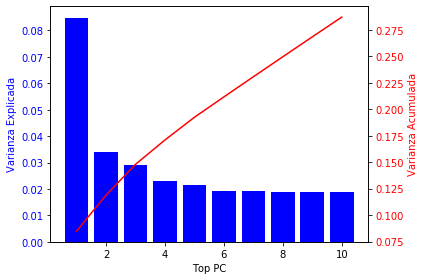

In [21]:
# Generamos el PCA
n_comps = 10
components = range(1,n_comps + 1)
pca = decomposition.PCA(n_components=n_comps)
pca.fit(xscal)
xpca = pca.transform(xscal)
eigenvalues = pca.explained_variance_ratio_
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [22]:
#Encontramos que con 10 PC no explicamos ni el 30% de la varianza

reduced_dim = 10
xpca_rd = xpca[:,0:reduced_dim]
kmeans_rd = KMeans(n_clusters=3, random_state=10).fit(xpca_rd)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd.labels_ = kmeans_rd.labels_
kmeans_rd.labels_
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd

array([[-1.20246196e+00, -2.94903565e+00,  9.07286724e-01,
        -8.45143928e-01, -2.93070570e-01,  3.79758385e-02,
         5.33926247e-02,  1.40948472e-02,  2.39219076e-01,
         3.13562720e-02],
       [-2.32612475e+00,  9.06250403e-01,  4.35291357e-01,
         9.23400600e-02,  9.70688953e-02,  1.92637410e-02,
        -3.40474497e-02,  1.15427380e-02, -7.58049141e-02,
        -2.04957039e-02],
       [ 1.56219055e+00, -1.45008053e-02, -4.10945306e-01,
         9.32098024e-02, -5.51724101e-03, -1.78080249e-02,
         1.05238428e-02, -9.16495157e-03,  2.50953242e-03,
         6.47151155e-03]])

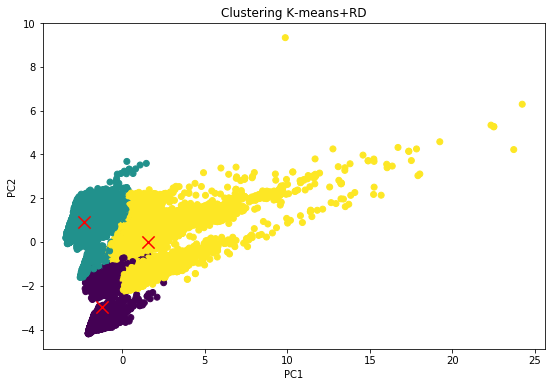

In [23]:
# K-Means + RD (Con las 3 primeras PC)
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering K-means+RD')
plt.show()

In [24]:
sill_score_rd = silhouette_score(xpca,kmeans_rd.labels_)
print(sill_score_rd)

0.26490662991747466


In [25]:
# El silhouette score encontrado para el clustering general es muy bajo, vamos a probar con el resto

In [26]:
#Clustering de importadas
tp_importadas = tp_cluster.loc[tp_cluster['brand'].isin(['Peñón del Águila',
       'Bass Brewery', 'Leffe', "Fuller's",
       'Spaten-Franziskaner-Bräu', 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Barba Roja', 'Coopers Brewery',
       'Brouwerij Van Steenberge', 'Hoegaarden', 'Backus y Johnston',
       'Löwenbräu', 'Brauerei Beck & Co',
       'Fabricas Nacionales De Cerveza',
       'De La Vaca Tranquila Cervezas Artesanales',
       'Paulaner Brauerei München', 'Duvel Moortgat', 'Zillertal',
       'Baltika Breweries', 'Hofbräu München', 'Chimay',
       'Kronenbourg 1664', 'Czechvar', 'Kulmbacher Brauerei AG',
       'Grimbergen', 'Maredsous', 'Tsingtao',
       'Fábricas Nacionales De Cerveza',
       'Anchor Brewing Company', 'Cervecería Antares',
       'Brasserie de Silly', 'SAB Miller', 'Shock Top', 'Belsh',
       'OETTINGER Brauerei GmbH', 'Erdinger Weissbräu', 'Oranjeboom'])]

In [27]:
#Genero dummies de brand
brands_i = pd.get_dummies(tp_importadas.brand)
category_i = pd.get_dummies(tp_importadas.category)
tp_cluster2 = pd.concat([tp_importadas,brands_i,category_i],axis=1)
tp_cluster2 = tp_cluster2.drop(['brand','category'], axis=1)
tp_cluster2.head(3)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day,Anchor Brewing Company,...,Paulaner Brauerei München,Peñón del Águila,SAB Miller,Shock Top,Spaten-Franziskaner-Bräu,Tsingtao,Zillertal,Beer,Merchandise,Mixed Pack
2,2.7181,234.6542,265.0,14.7222,1,176.2018,2017,2,28,0,...,0,1,0,0,0,0,0,1,0,0
3,1.8052,155.8458,44.0,9.7778,4,117.0246,2017,2,28,0,...,0,1,0,0,0,0,0,1,0,0
5,2.7181,234.6542,265.0,14.7222,1,176.2018,2017,2,28,0,...,0,1,0,0,0,0,0,1,0,0


In [28]:
tp_cluster2.shape

(18818, 50)

In [29]:
#AutoScaling
scaler_impo = preprocessing.StandardScaler().fit(tp_cluster2)
xscal_impo = scaler_impo.transform(tp_cluster2)

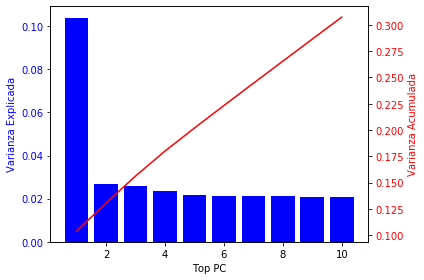

In [30]:
# Generamos el PCA

n_comps = 10
components = range(1,n_comps + 1)
pca_impo = decomposition.PCA(n_components=n_comps)
pca_impo.fit(xscal_impo)
xpca_impor = pca_impo.transform(xscal_impo)
eigenvalues_impo = pca_impo.explained_variance_ratio_
eigenvalues_acum_impo = pca_impo.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues_impo, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum_impo, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [31]:
#Nuevamente, encontramos que con 10 PC tampoco explicamos adecuadamente el modelo
reduced_dim = 2
xpca_rd_impo = xpca_impor[:,0:reduced_dim]
kmeans_rd_impo = KMeans(n_clusters=3, random_state=10).fit(xpca_rd_impo)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd_impo.labels_ = kmeans_rd_impo.labels_
centers_rd_impo = kmeans_rd_impo.cluster_centers_

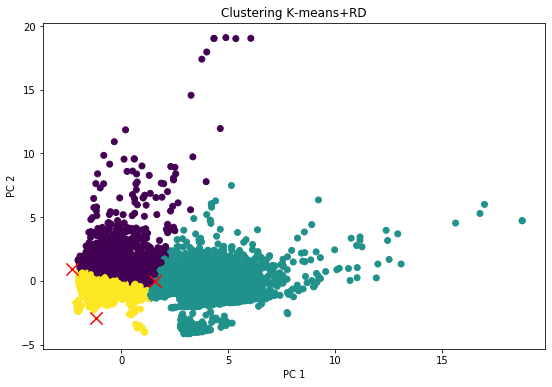

In [32]:
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd_impo[:,0],xpca_rd_impo[:,1],c=kmeans_rd_impo.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

In [33]:
sill_score_rd = silhouette_score(xpca_rd_impo,kmeans_rd_impo.labels_)
print(sill_score_rd)

0.47272416745083895


In [34]:
#En este caso el silhouette nos da un poco mejor, casi 50%

In [73]:
#Clustering de las nacionales
tp_nacional = tp_cluster.loc[tp_h['brand'].isin(['Corona', 'Patagonia Brewing Co.', 'BevyBar',
       'Stella Artois', 'Cervecería y Maltería Quilmes'])]

In [74]:
brandsnac = pd.get_dummies(tp_nacional.brand)
category = pd.get_dummies(tp_nacional.category)
tp_nac = pd.concat([tp_nacional,brandsnac,category],axis=1)
tp_nac = tp_nac.drop(['brand','category'], axis=1)
tp_nac.head(3)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day,BevyBar,Cervecería y Maltería Quilmes,Corona,Patagonia Brewing Co.,Stella Artois,Beer,Merchandise,Mixed Pack
0,0.0000,1030.0,890.0,140.0,1,788.0530,2017,9,20,0,0,1,0,0,1,0,0
1,0.0000,631.0,432.0,199.0,1,493.6944,2017,6,13,0,0,0,1,0,0,0,1
4,9.0465,910.0,1011.0,49.0,1,698.5160,2017,7,30,1,0,0,0,0,0,0,1


In [75]:
#AutoScaling
scaler_nac = preprocessing.StandardScaler().fit(tp_nac)
xscal_nac = scaler_nac.transform(tp_nac)

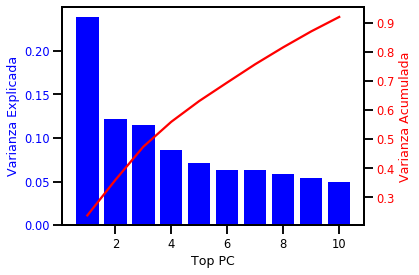

In [76]:
n_comps = 10
components = range(1,n_comps + 1)
pca_nac = decomposition.PCA(n_components=n_comps)
pca_nac.fit(xscal_nac)
xpca_nac = pca_nac.transform(xscal_nac)
eigenvalues_nac = pca_nac.explained_variance_ratio_
eigenvalues_acum_nac = pca_nac.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues_nac, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum_nac, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [77]:
#En este caso estamos mucho mejor, con las 10 PC explicamos el 90% de la varianza

In [79]:
reduced_dim_nac = 2
xpca_rd_nac = xpca_nac[:,0:reduced_dim_nac]
kmeans_rd_nac = KMeans(n_clusters=3, random_state=10).fit(xpca_rd_nac)
kmeans_rd_nac.labels_ = kmeans_rd_nac.labels_
centers_rd_nac = kmeans_rd_nac.cluster_centers_

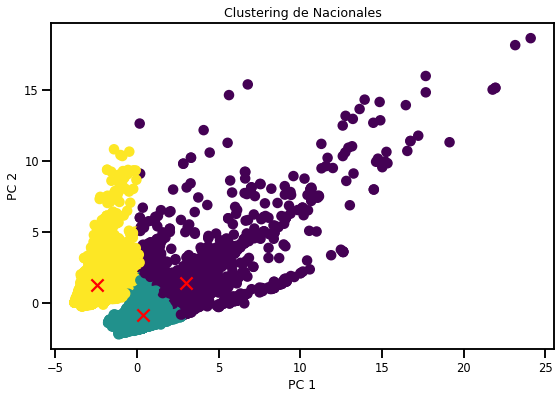

In [80]:
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd_nac[:,0],xpca_rd_nac[:,1],c=kmeans_rd_nac.labels_.astype(float))
plt.scatter(centers_rd_nac[:,0], centers_rd_nac[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering de Nacionales')
plt.show()

In [42]:
sill_score_rd = silhouette_score(xpca_rd_nac,kmeans_rd_nac.labels_)
print(sill_score_rd)

0.5895212226078267


### En este caso no solo las PC explican mejor la varianza, sino que obtenemos un silhouette score de casi 0,6
### Siendo este el de mejor resultado, decidimos poner foco en él y proceder unicamente con su analisis

## EDA de los Clusters encontrados


In [81]:
#Reintroducimos features que nos pueden servir para el analisis
tp_aux= tp_h.loc[tp_h['brand'].isin(['Corona', 'Patagonia Brewing Co.', 'BevyBar',
       'Stella Artois', 'Cervecería y Maltería Quilmes'])]
tp_nacional['id'] = tp_aux['id']
tp_nacional['name'] = tp_aux['name']
tp_nacional['labels'] = kmeans_rd_nac.labels_
tp_nacional.labels.value_counts()

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

1    23438
2     9570
0     4654
Name: labels, dtype: int64

In [82]:
tp_nacional.head(5)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,brand,category,year,month,day,id,name,labels
0,0.0000,1030.0,890.0,140.0,1,788.0530,Corona,Beer,2017,9,20,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",Pack Corona Experience,2
1,0.0000,631.0,432.0,199.0,1,493.6944,Patagonia Brewing Co.,Mixed Pack,2017,6,13,"[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...",Pack de Cervezas y Vasos Patagonia,1
4,9.0465,910.0,1011.0,49.0,1,698.5160,BevyBar,Mixed Pack,2017,7,30,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",Pack Degustación del Mes de Julio XL,1
7,0.0000,820.0,690.0,130.0,1,627.3820,Stella Artois,Mixed Pack,2017,9,24,"[""ar_bevybar;0f725d8dfc2bfa356bb643582d5efff86...",Copas Stella Artois 330ml - Pack 6 unidades,1
8,0.0000,314.0,209.0,105.0,1,235.7826,Stella Artois,Merchandise,2017,2,14,"[""ar_bevybar;7b2eb6f3e8e3919aa0a7f7d66b5c1852d...",Copa Edición Limitada Stella Artois Uganda,2


In [85]:
#Hago EDA de lo nacional
tp_nac_0 = tp_nacional.loc[tp_nacional['labels'].isin(['0'])]
tp_nac_1 = tp_nacional.loc[tp_nacional['labels'].isin(['1'])]
tp_nac_2 = tp_nacional.loc[tp_nacional['labels'].isin(['2'])]

In [86]:
tp_nac_0.isnull().sum()
tp_nac_1.isnull().sum()
tp_nac_2.isnull().sum()

unit_discount_usd              0
unit_gross_revenue_local       0
unit_price_charged_local       0
unit_delivery_charged_local    0
quantity                       0
unit_net_revenue_local         0
brand                          0
category                       0
year                           0
month                          0
day                            0
id                             0
name                           0
labels                         0
dtype: int64

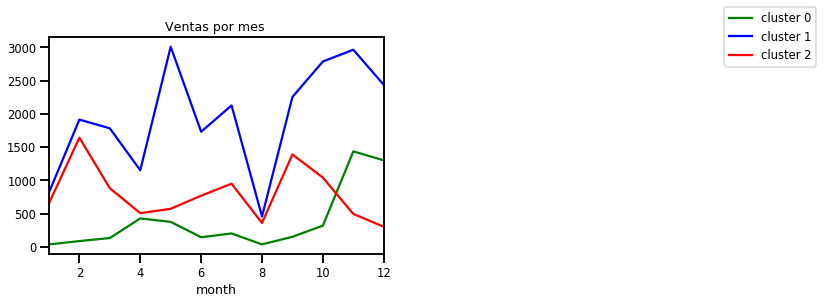

In [87]:
#Volumen de cantidad de operaciones de compra
sns.set_context("talk", font_scale=0.7)
tp_nac_0.groupby(['month']).count()[('quantity')].plot(title = "Ventas por mes ", color= "green", label= "cluster 0" )
tp_nac_1.groupby(['month']).count()[('quantity')].plot(title = "Ventas por mes ", color= "blue", label= "cluster 1" )
tp_nac_2.groupby(['month']).count()[('quantity')].plot(title = "Ventas por mes ", color= "red",  label= "cluster 2")
plt.legend(loc='center left', bbox_to_anchor=(2, 1))
plt.show()

In [49]:
tp_pivot_nac = pd.pivot_table(data = tp_nacional, values = ['quantity'], index = ['labels'], columns = ['category'], aggfunc= np.sum, )
tp_pivot_nac

quantity                       
category     Beer Merchandise Mixed Pack
labels                                  
0           529.0       437.0     7481.0
1            60.0         NaN    25631.0
2          9159.0      8029.0        NaN

In [88]:
comprasporusuario_nac_0 = tp_nac_0.groupby(['id'])['id'].count()
comprasporusuario_nac_1 = tp_nac_1.groupby(['id'])['id'].count()
comprasporusuario_nac_2 = tp_nac_2.groupby(['id'])['id'].count()

In [89]:
#Saco Outliers
comprasporusuario_nac_0 = comprasporusuario_nac_0.loc[comprasporusuario_nac_0 < 10]
comprasporusuario_nac_1 = comprasporusuario_nac_1.loc[comprasporusuario_nac_1 < 10]
comprasporusuario_nac_2 = comprasporusuario_nac_2.loc[comprasporusuario_nac_2 < 10]

Text(0.5, 0, 'id')

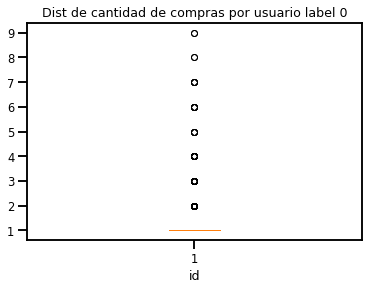

In [90]:
plt.boxplot(comprasporusuario_nac_0)
plt.title("Dist de cantidad de compras por usuario label 0")
plt.xlabel("id")

Text(0.5, 0, 'id')

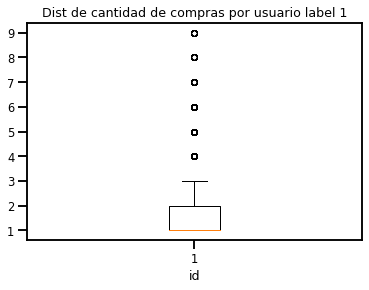

In [93]:
plt.boxplot(comprasporusuario_nac_1)
plt.title("Dist de cantidad de compras por usuario label 1")
plt.xlabel("id")

Text(0.5, 0, 'id')

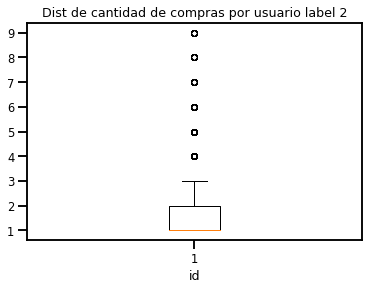

In [94]:
plt.boxplot(comprasporusuario_nac_2)
plt.title("Dist de cantidad de compras por usuario label 2")
plt.xlabel("id")

Text(0.5, 0, 'unit_gross_revenue_local')

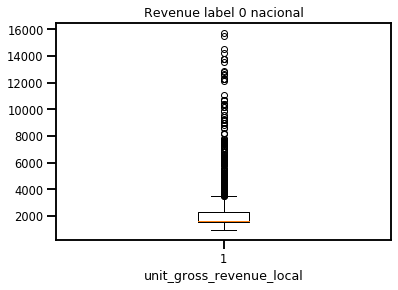

In [114]:
#Boxplots de la utilidad de cada compra
plt.boxplot(tp_nac_0['unit_gross_revenue_local'])
plt.title("Revenue label 0 nacional")
plt.xlabel("unit_gross_revenue_local")


Text(0.5, 0, 'unit_gross_revenue_local')

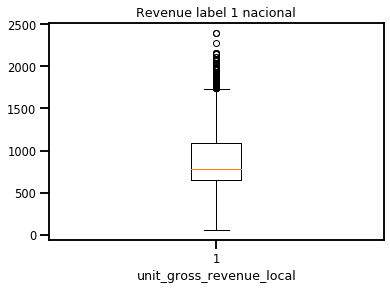

In [115]:
plt.boxplot(tp_nac_1['unit_gross_revenue_local'])
plt.title("Revenue label 1 nacional")
plt.xlabel("unit_gross_revenue_local")


Text(0.5, 0, 'unit_gross_revenue_local')

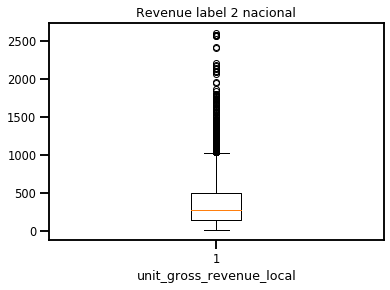

In [116]:
plt.boxplot(tp_nac_2['unit_gross_revenue_local'])
plt.title("Revenue label 2 nacional")
plt.xlabel("unit_gross_revenue_local")

## Este primer analisis nos permite confirmar que solo en casos muy aislados, quien gasta mas de 2000 pesos vuelve a realizar una compra


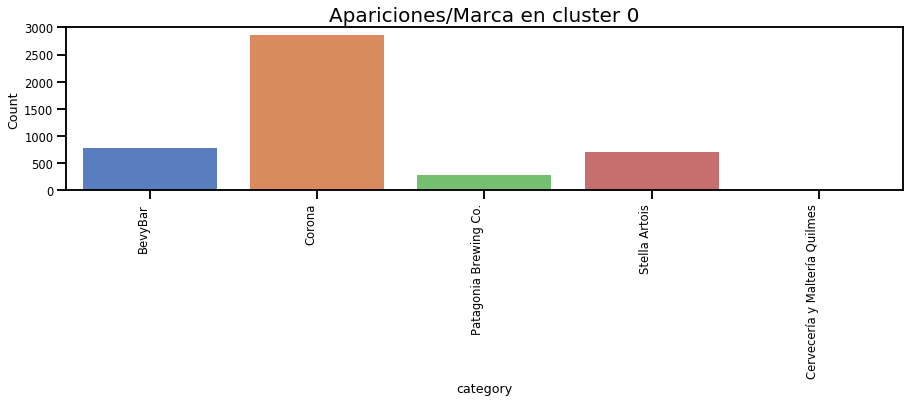

In [96]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data= tp_nac_0, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Apariciones/Marca en cluster 0',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

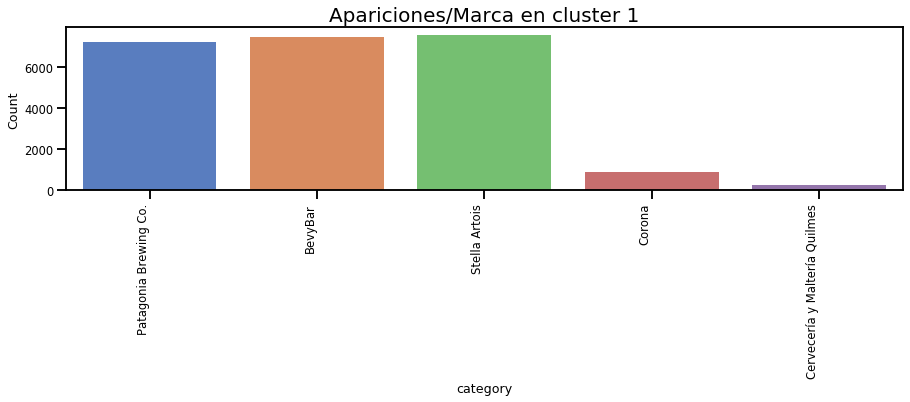

In [97]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data= tp_nac_1, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Apariciones/Marca en cluster 1',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

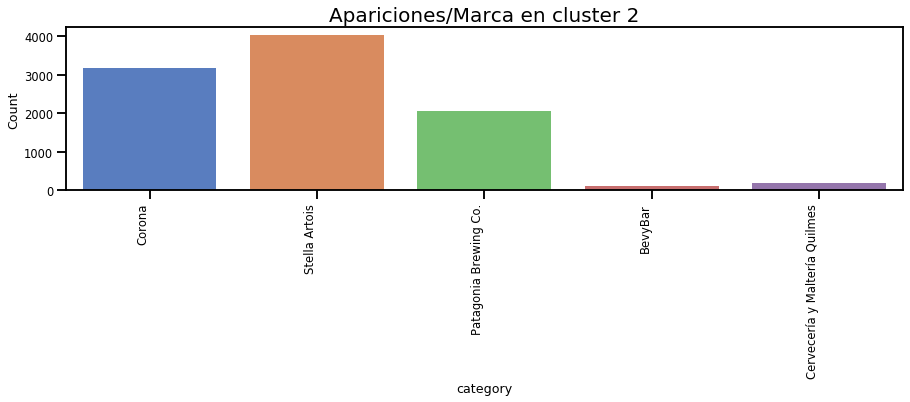

In [99]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data= tp_nac_2, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Apariciones/Marca en cluster 2',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

In [100]:
# En las tp_nac_0 vamos a ver si hay algun producto de Corona que sea mas relevante
aux0= tp_nac_0.loc[tp_nac_0['brand'].isin(["Corona"])]
aux0.name.value_counts()

Pack Conservadora Corona                       2601
Pack Corona Experience                           75
Pack de Cervezas y Frapera Corona                34
Cerveza Corona Extra 710ml                       26
Cerveza Corona Sunsets Edición Limitada          21
Pack de Cervezas y Gorra Corona by Martha        21
Pack Cervezas Corona Sunsets y Frapera           14
Pack Modelo Mexicano                             13
Pack de 24 Cervezas Corona 355ml                 12
Frapera Corona                                   11
Cerveza Corona Extra                              9
Pack de 12 Cervezas Corona 710ml                  7
Pack de 24 Cervezas Corona Edición Especial       6
Cerveza Negra Modelo                              3
Frapera Corona Jumbo                              2
Cooler Corona                                     2
Cortador de Lima Corona                           1
Name: name, dtype: int64

In [103]:
#El producto mas destacado del cluster 0 es ampliamente el "Pack Conservadora Corona", el cual previamente habiamos visto
# era uno de los productos mas vendidos del portal.

#Validamos que en el resto no aparece
aux1= tp_nac_1.loc[tp_nac_1['brand'].isin(["Corona"])]
aux1.name.value_counts()

Pack de Cervezas y Frapera Corona              426
Pack Modelo Mexicano                           236
Pack Cervezas Corona Sunsets y Frapera         122
Pack de 24 Cervezas Corona 355ml                84
Pack de 12 Cervezas Corona 710ml                24
Pack de 12 Cervezas Corona Edición Especial      9
Pack de 24 Cervezas Corona Edición Especial      2
Frapera Corona Jumbo                             1
Name: name, dtype: int64

In [104]:
aux2= tp_nac_2.loc[tp_nac_2['brand'].isin(["Corona"])]
aux2.name.value_counts()

Pack Corona Experience                     1093
Frapera Corona                              554
Cerveza Negra Modelo                        399
Cortador de Lima Corona                     368
Porta Lima Corona                           282
Cerveza Corona Extra                        195
Cerveza Corona Sunsets Edición Limitada     168
Cerveza Corona Extra 710ml                  101
Gorra Corona by Martha                       11
Name: name, dtype: int64

### Veamos los gastos de envio de cada cluster

Text(0.5, 0, 'unit_gross_revenue_local')

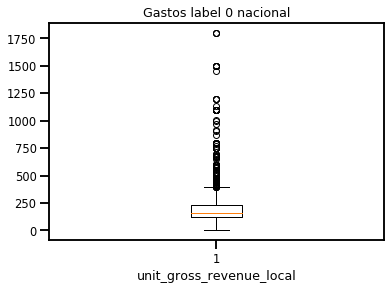

In [105]:
plt.boxplot(tp_nac_0['unit_delivery_charged_local'])
plt.title("Gastos label 0 nacional")
plt.xlabel("unit_gross_revenue_local")

Text(0.5, 0, 'unit_gross_revenue_local')

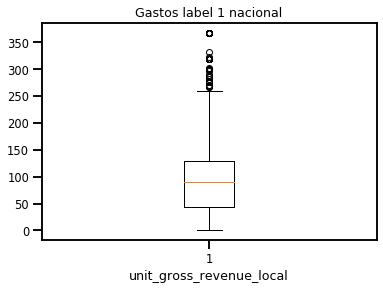

In [106]:
plt.boxplot(tp_nac_1['unit_delivery_charged_local'])
plt.title("Gastos label 1 nacional")
plt.xlabel("unit_gross_revenue_local")

Text(0.5, 0, 'unit_gross_revenue_local')

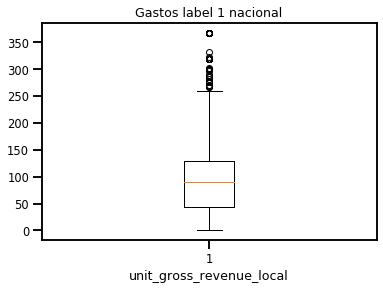

In [107]:
plt.boxplot(tp_nac_1['unit_delivery_charged_local'])
plt.title("Gastos label 1 nacional")
plt.xlabel("unit_gross_revenue_local")

In [108]:
#No se ven grandes variaciones entre los costos de envio de los clusters, por lo que no nos permite obtener nuevas conclusiones

In [111]:
#Evaluando nuevamente los productos mas vendidos de cada cluster
tp_nac_1.name.value_counts()

Copas Stella Artois 330ml - Pack 6 unidades                 2172
Copa Patagonia 400ml - Pack 6 unidades                      1613
Pack de 6 Copas de Edición Limitada                         1426
Pack de 3 Copas Edición Limitada                            1298
Pack de Cervezas Europeas                                   1192
Pack de Cervezas y Vasos Patagonia                          1107
Pack de Cervezas y Chopp Patagonia Octubrefest               896
Copas Stella Artois 250ml - Pack 6 unidades                  564
Vaso Patagonia Curvo 500ml. - Pack 6 unidades                544
Pack de Cervezas y Vasos Patagonia XL                        537
Copas Stella Artois Navidad - Pack 6 unidades                517
Pack de Cervezas y Frapera Corona                            426
Pack de Cervezas y Copas Stella Artois Christmas Edition     425
Pack de cervezas y Vasos Patagonia 24.7                      413
Pack de Cervezas y Vasos de Colección                        391
Pack Coleccionista - Ener

In [113]:
tp_nac_2.name.value_counts()

Pack Corona Experience                                  1093
Copa Edición Limitada Stella Artois Brasil               946
Copa Edición Limitada Stella Artois Uganda               925
Destapador Stella Artois                                 727
Copa Edición Limitada Stella Artois Camboya              608
Frapera Corona                                           554
Cerveza Negra Modelo                                     399
Cortador de Lima Corona                                  368
Cerveza Patagonia 24.7 - Session IPA con Sauco 710ml     361
Daga Stella Artois                                       340
Porta Lima Corona                                        282
Destapador Patagonia                                     232
Cerveza Patagonia Octubrefest 710ml                      210
Cerveza Corona Extra                                     195
Cerveza Corona Sunsets Edición Limitada                  168
Cerveza Stella Artois Christmas Edition                  161
Cerveza Patagonia Küné 7

## Al realizar la clusterizacion encontramos que  la mejor representación se obtenia con 3 clusters, ya que el algoritmo encontró similaridades a partir de:
    0- Productos extraordinarios, de alto valor, principalmente la conservadora corona, el producto mas vendido de todos
    1- Packs, tanto de copas como de cervezas, que en general tienen un valor medio "medio", marcas Stella, Patagonia y 
    Bevybar
    2- Productos inviduales, copas y cervezas, con un una mediana de precio baja
    
Los clusters 1 y 2, tienen una cantidad de operaciones de compra (mean y boxplot) muy similar, mientras que el primero, no tiene compras recurrentes, por lo que la venta de la conservadora corona, el producto mas vendido y con mayor publicidad, no genera fidelizacion de compra, ya que los usuarios no vuelven a comprar